# Covid Analysis

This notebook analyzes the US Covid data from this web site: [The Covid Tracker: Data](https://covidtracking.com/data/download).  the data definitions can be found on a page linked form that initial page: [The Covid Tracker: Data Definition](https://covidtracking.com/about-data/data-definitions).

The first level of analysis is to performa a moving average to find the 'average' shape of the curve for number of new cases, which is indicated by the field name <font face='courier'>positiveIncrease</font>.

This example is for illustration of a data analysis and so, to save a bit of effort we will not worry about formatting the x-axis tickmark labels for clarity.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## Data Wrangling

The cell below does some data wrangling to get the data in shape for analysis.  We won't spend time on this code in class.

In [6]:
f = open('national-history.csv','r')
data = f.readlines()
f.close()

date_cutoff = 20200229

data[0] = data[0].replace('"','').strip().strip('"').split(',')
ind = False
for i in range(len(data[0])):
    if data[0][i] == 'positiveIncrease':
        ind = i
        break
        
if ind:
    for i in range(1,len(data)):
        data[i] = data[i].strip().split(',')
        data[i][0] = int(data[i][0].strip('"').replace('-',''))
        data[i][ind] = int(data[i][ind])


    headings = [data[0]]
    data = data[1:]
    for i in range(len(data)-1, -1, -1):
        if data[i][0]< date_cutoff:
            del[data[i]]
    data.sort()
    data = headings + data

    date = [data[i][ind] for i in range(1,len(data)) if data[i][0] >= 20200229]
    y = [data[i][ind] for i in range(1,len(data)) if data[i][0] >= 20200229]
    x = [i for i in range(1,len(data)) if data[i][0] >= 20200229]

Let's look at the data.

In [148]:
data[:5]

[['date',
  'death',
  'deathIncrease',
  'inIcuCumulative',
  'inIcuCurrently',
  'hospitalizedIncrease',
  'hospitalizedCurrently',
  'hospitalizedCumulative',
  'negative',
  'negativeIncrease',
  'onVentilatorCumulative',
  'onVentilatorCurrently',
  'posNeg',
  'positive',
  'positiveIncrease',
  'recovered',
  'states',
  'totalTestResults',
  'totalTestResultsIncrease'],
 [20200229,
  '5',
  '1',
  '',
  '',
  '0',
  '',
  '',
  '24',
  '24',
  '',
  '',
  '42',
  '18',
  18,
  '',
  '2',
  '42',
  '42'],
 [20200301,
  '8',
  '3',
  '',
  '',
  '0',
  '',
  '',
  '85',
  '61',
  '',
  '',
  '130',
  '45',
  27,
  '',
  '4',
  '130',
  '88'],
 [20200302,
  '11',
  '3',
  '',
  '',
  '0',
  '',
  '',
  '243',
  '158',
  '',
  '',
  '328',
  '85',
  40,
  '',
  '4',
  '328',
  '198'],
 [20200303,
  '14',
  '3',
  '',
  '',
  '0',
  '',
  '',
  '446',
  '203',
  '',
  '',
  '572',
  '126',
  41,
  '',
  '4',
  '572',
  '244']]

Let's visualize the data.  What patterns or characteristics do you see?

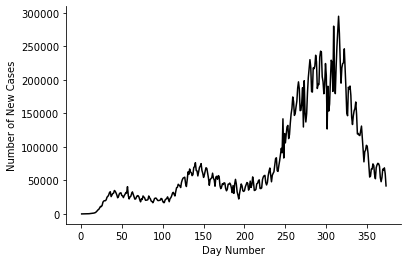

In [7]:
fig,ax = plt.subplots()
ax.plot(x,y, c='k')
ax.set_xlabel('Day Number')
ax.set_ylabel('Number of New Cases')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.vlines(100, 0, 75000, linestyles='dashed', colors=['gray'])
plt.show()

Let's compute, and view, a moving average to look at the overall average trend.

Let's also subtract out the trend and view the remainder.  Does it have any obvious patterns?

Sum of Squared Errors: 8.044340e+10


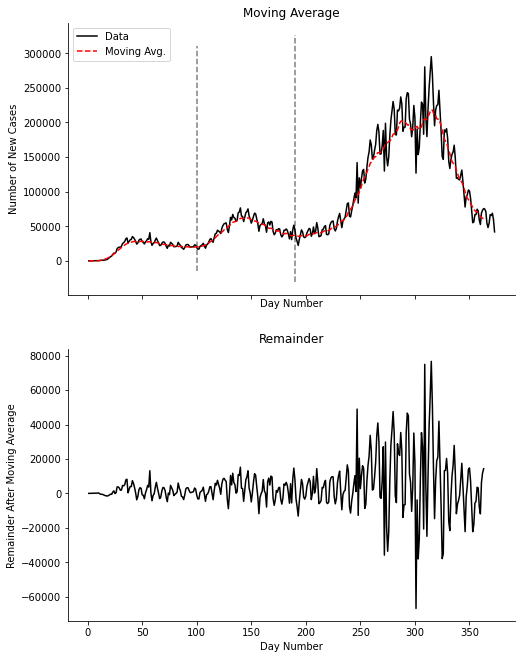

In [49]:
mv_avg_period = 20
offset = int(mv_avg_period/2)
mv_avg = [0 for i in range(mv_avg_period - offset)] + [sum(y[i-mv_avg_period:i-1])/mv_avg_period for i in range(mv_avg_period, len(y))] 
remainder = [y[i] - mv_avg[i] for i in range(len(y[:-offset]))]
sse = sum([r**2 for r in remainder])
print('Sum of Squared Errors: %e' % sse)
fig,ax = plt.subplots(2,1, sharex=True)
ax[0].plot(x,y, c='k', label='Data')
ax[0].plot(x[:-offset],mv_avg, c='r', linestyle='--', label='Moving Avg.')
ax[0].set_xlabel('Day Number')
ax[0].set_ylabel('Number of New Cases')
ax[0].vlines(100, ax[0].get_ylim()[0],  ax[0].get_ylim()[1], linestyles='dashed', colors=['gray'])
ax[0].vlines(190, ax[0].get_ylim()[0],  ax[0].get_ylim()[1], linestyles='dashed', colors=['gray'])
ax[0].legend()
ax[0].set_title('Moving Average')
ax[1].plot(x[:-offset],remainder,c='k')
ax[1].set_xlabel('Day Number')
ax[1].set_ylabel('Remainder After Moving Average')
ax[1].set_title('Remainder')
for i in range(len(ax)):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
fig.set_size_inches(8,11)
plt.show()

# A Linear Trend Model

In [21]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print('intercept =', intercept, '    slope =', slope, '     p_value = ',p_value)

intercept = -8374.700942661933     slope = 457.05778342407854      p_value =  1.5033112874130082e-61


Sum of Squared Errors: 8.250289e+11


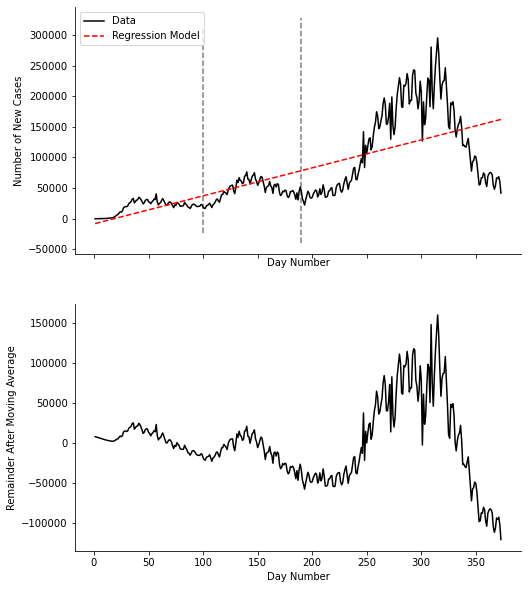

In [31]:
regress_model = [intercept + slope * i for i in x]
remainder = [y[i] - regress_model[i] for i in range(len(y))]
sse = sum([r**2 for r in remainder])
print('Sum of Squared Errors: %e' % sse)
fig,ax = plt.subplots(2,1, sharex=True)
ax[0].plot(x,y, c='k', label='Data')
ax[0].plot(x,regress_model, c='r', linestyle='--', label='Regression Model')
ax[0].set_xlabel('Day Number')
ax[0].set_ylabel('Number of New Cases')
ax[0].vlines(100, ax[0].get_ylim()[0],  ax[0].get_ylim()[1], linestyles='dashed', colors=['gray'])
ax[0].vlines(190, ax[0].get_ylim()[0],  ax[0].get_ylim()[1], linestyles='dashed', colors=['gray'])
ax[0].legend()
ax[1].plot(x,remainder,c='k')
ax[1].set_xlabel('Day Number')
ax[1].set_ylabel('Remainder After Moving Average')
for i in range(len(ax)):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
fig.set_size_inches(8,10)
plt.show()

## Autocorrelation Analysis

We will use <font face='courier'>numpy</font> to compute autocorrelation.

In [87]:
import numpy as np

In [104]:
def autocorr(x, t=1):
    return np.corrcoef(np.array([x[:-t], x[t:]]))

The results below demosntrate a clear pattern of 7-day cyclicality.  What might be causing it?

In [110]:
for lag in range(1,21):
    print('Correlation with lag ' + str(lag) + ': ', autocorr(remainder,t=lag)[0,1])

Correlation with lag 1:  0.54406908610024
Correlation with lag 2:  0.06944071340293036
Correlation with lag 3:  -0.24352768267821404
Correlation with lag 4:  -0.2667482853964427
Correlation with lag 5:  -0.027336447451804583
Correlation with lag 6:  0.3887770353773463
Correlation with lag 7:  0.6249105627244699
Correlation with lag 8:  0.4201640355029149
Correlation with lag 9:  -0.0667635171605197
Correlation with lag 10:  -0.3956893431723991
Correlation with lag 11:  -0.3589080899381073
Correlation with lag 12:  -0.03610586934901375
Correlation with lag 13:  0.3865379908608228
Correlation with lag 14:  0.604222584295389
Correlation with lag 15:  0.3701215040289834
Correlation with lag 16:  -0.054187102895258424
Correlation with lag 17:  -0.39546416580760463
Correlation with lag 18:  -0.4167599284114806
Correlation with lag 19:  -0.11840998561565293
Correlation with lag 20:  0.25544755210847003


Note that a period of 7 days is consistent with a weekly repeating cyclicality.  One issue with computing this cyclicality is that the magnitude of the current remainder is not of a constant magnitude.

In [55]:
cycl = [sum([remainder[j*7 + i] for j in range(int(len(remainder)/7))])/int(len(remainder)/7) for i in range(7)]
print(sum(cycl)*int(len(remainder)/7), sum(remainder))
print(cycl)

1466609.0499999998 1482403.8000000003
[8836.312745098036, -2298.674509803922, -7174.449019607842, 614.4411764705883, 7654.980392156863, 9176.410784313726, 11948.01862745098]


Sum of Squared Errors: 5.854630e+10


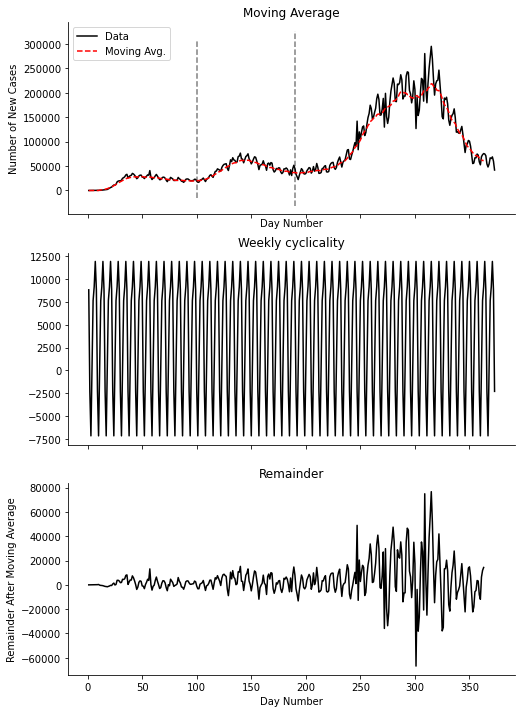

In [56]:
mv_avg_period = 20
offset = int(mv_avg_period/2)
mv_avg = [0 for i in range(mv_avg_period - offset)] + [sum(y[i-mv_avg_period:i-1])/mv_avg_period for i in range(mv_avg_period, len(y))] 
remainder = [y[i] - mv_avg[i] for i in range(len(y[:-offset]))]
remainder1 = [remainder[i] - cycl[i%7] for i in range(len(y[:-offset]))]
sse = sum([r**2 for r in remainder1])
print('Sum of Squared Errors: %e' % sse)
fig,ax = plt.subplots(3,1, sharex=True)
ax[0].plot(x,y, c='k', label='Data')
ax[0].plot(x[:-offset],mv_avg, c='r', linestyle='--', label='Moving Avg.')
ax[0].set_xlabel('Day Number')
ax[0].set_ylabel('Number of New Cases')
ax[0].vlines(100, ax[0].get_ylim()[0],  ax[0].get_ylim()[1], linestyles='dashed', colors=['gray'])
ax[0].vlines(190, ax[0].get_ylim()[0],  ax[0].get_ylim()[1], linestyles='dashed', colors=['gray'])
ax[0].legend()
ax[0].set_title('Moving Average')
ax[1].plot(x, [cycl[i%7] for i in range(len(y))], c='k')
ax[1].set_title('Weekly cyclicality')
ax[2].plot(x[:-offset],remainder,c='k')
ax[2].set_xlabel('Day Number')
ax[2].set_ylabel('Remainder After Moving Average')
ax[2].set_title('Remainder')
for i in range(len(ax)):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
fig.set_size_inches(8,12)
plt.show()

In [44]:
print(sum(remainder))
print(sum(remainder1))

1482403.8000000003
-26545074.916981142
